# Global Warming linear regression 

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#load data
data = pd.read_csv("climate_change.csv")
print(data.shape)
data.head()


(308, 11)


,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
#collecting data
X = data['CO2'].values
Y = data['Temp'].values

In [27]:
#Mean of independante and dependate variables 

mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values 
n = len(X)

#calculate slope and constante variables 
numer = 0
denom = 0

for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2

b1 = numer /denom
b0 = mean_y - (b1 * mean_x)

print(b1, b0)

0.01059920930610682 -3.5931404092139787


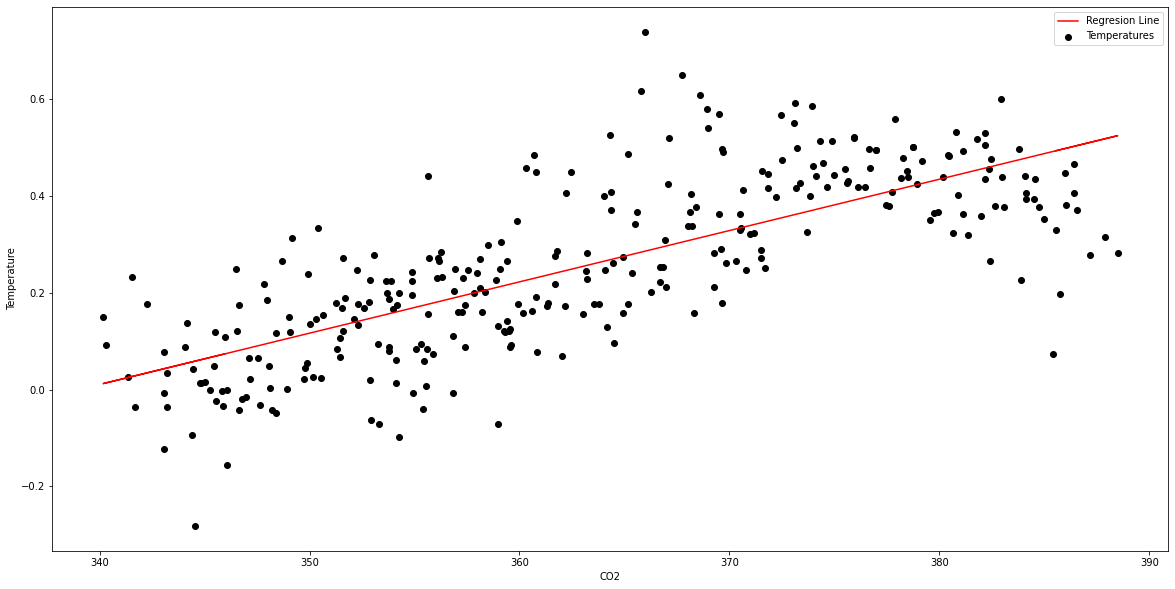

In [28]:
#value of x and y 

y = b0 + b1 * X

#ploting the regression line 
plt.plot(X, y, color = 'red', label= 'Regresion Line')

#scatter plot 
plt.scatter(X, Y, c = 'black', label = 'Temperatures')

plt.xlabel('CO2')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [30]:
#Rsquare 
ss_t = 0
ss_r = 0
for i in range(n - 1):
    y_pred = b0 + b1 * x[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.5579602829949311


In [32]:
#value of CO2 in 2020 october attended 411. Let view what will happend when the Co2 emmission will be 450 

expected = 450 * b1 + b0
print(expected)

1.1765037785340904


In [7]:
from numpy import cov
covariance = cov(X, Y)
print(covariance)

[[1.59949767e+02 1.69534106e+00]
 [1.69534106e+00 3.20731451e-02]]


In [9]:
from scipy.stats import pearsonr
corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.749
